In [2]:
import kwant
import numpy as np
from cmath import exp
from math import pi, sqrt, tanh
import matplotlib.pyplot as plt
from ipywidgets import interact
import time
import sys
import tinyarray
from kwant.digest import uniform    # a (deterministic) pseudorandom number generator

In [3]:
# armchair edges

t=1.0
t_sc=0.5

# Define the graphene lattice

tau_x = tinyarray.array([[0, 1], [1, 0]])
tau_y = tinyarray.array([[0, -1j], [1j, 0]])
tau_z = tinyarray.array([[1, 0], [0, -1]])


def make_system(W=200, L=200, m=0.1, mu=0.6, phi=0):

            
    def qh_slab(pos):
        (x, y) = pos 
        return (0 <= x < L) and (0 <= y < W)

    def hopping_ab(site_i, site_j, phi):
        xi, yi = site_i.pos
        xj, yj = site_j.pos
#         # modulated hopping in x direction
        return -t*exp(-1j * pi* phi * (xi - xj) * (yi + yj-W))

    def onsite(site, mu):
        return  - mu
   
    def onsiteA(site, m,mu):
        return  m- mu
    
    def onsiteB(site, m,mu):
        return  -m- mu

    
    # Define the graphene lattice
    sin_30, cos_30 = (1 / 2, sqrt(3) / 2)
    lat = kwant.lattice.general([(sqrt(3), 0), (0, 1)],
                                [(0, 0), (1/sqrt(3), 0), (3/sqrt(3)/2, 1/2),(5/sqrt(3)/2, 1/2)],norbs=1)
    subA1, subB1,subA2, subB2 = lat.sublattices
    syst = kwant.Builder()
    syst[subA1.shape(qh_slab, (0,0))] = onsiteA
    syst[subA2.shape(qh_slab, (3/sqrt(3)/2, 1/2))] = onsiteA
    syst[subB1.shape(qh_slab, (1/sqrt(3),0))] = onsiteB
    syst[subB2.shape(qh_slab, (5/sqrt(3)/2, 1/2))] = onsiteB
    syst[lat.neighbors()] = hopping_ab


    sym_right = kwant.TranslationalSymmetry(lat.vec((1, 0)))
    right_lead = kwant.Builder(sym_right)
    right_lead[subA1.shape(qh_slab, (0,0))] = onsiteA
    right_lead[subA2.shape(qh_slab, (3/sqrt(3)/2, 1/2))] = onsiteA
    right_lead[subB1.shape(qh_slab, (1/sqrt(3),0))] = onsiteB
    right_lead[subB2.shape(qh_slab, (5/sqrt(3)/2, 1/2))] = onsiteB
    right_lead[lat.neighbors()] = hopping_ab
    
    syst.attach_lead(right_lead)
    syst.attach_lead(right_lead.reversed())

    
    return syst

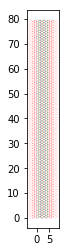

In [4]:
W=80
L=4
syst = make_system(W=W, L=L)
# Check that the system looks as intended.
# kwant.plot(syst, colorbar=False,fig_size=(40,10),num_lead_cells=2)
kwant.plot(syst,num_lead_cells=2)
# Finalize the system.
syst = syst.finalized()

In [6]:
mu=0.18
m=0.
momenta = [-pi + 0.02 * pi * i for i in range(101)]
def plot_wf(phi=0):
    params=dict(m=m, mu=mu, phi=phi, momenta=momenta)
    fig = plt.figure()  # create a figure object
    ax1 = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
    kwant.plotter.bands(syst.leads[0],params=params,ax=ax1)
    ax1.set_ylim(-1,1)
    plt.title(r'$\phi=$ %.3f' % (phi))
    plt.show()
    
interact(plot_wf, phi=(0, 0.01, 0.001));

interactive(children=(FloatSlider(value=0.0, description='phi', max=0.01, step=0.001), Output()), _dom_classes…

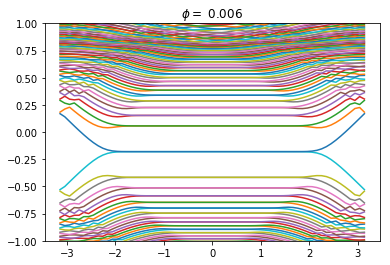

In [8]:
plot_wf(phi=0.006)